# Slide 27: Statistical vs Practical Significance - The Medicine That "Works"
## Quick Guide to What Really Matters

Sometimes math finds differences that don't matter in real life! Learn when "statistically significant" actually means something important.

## Setup and Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

print("💊 Statistical vs Practical Significance Made Simple!")
print("=" * 55)

💊 Statistical vs Practical Significance Made Simple!


---
## 💊 Simple Example: The "Miracle" Medicine

**Scenario:** A new medicine reduces fever from 102°F to 101.9°F. Is this "significant"?

🏥 THE MIRACLE MEDICINE STUDY
A pharmaceutical company tested their new fever medicine...



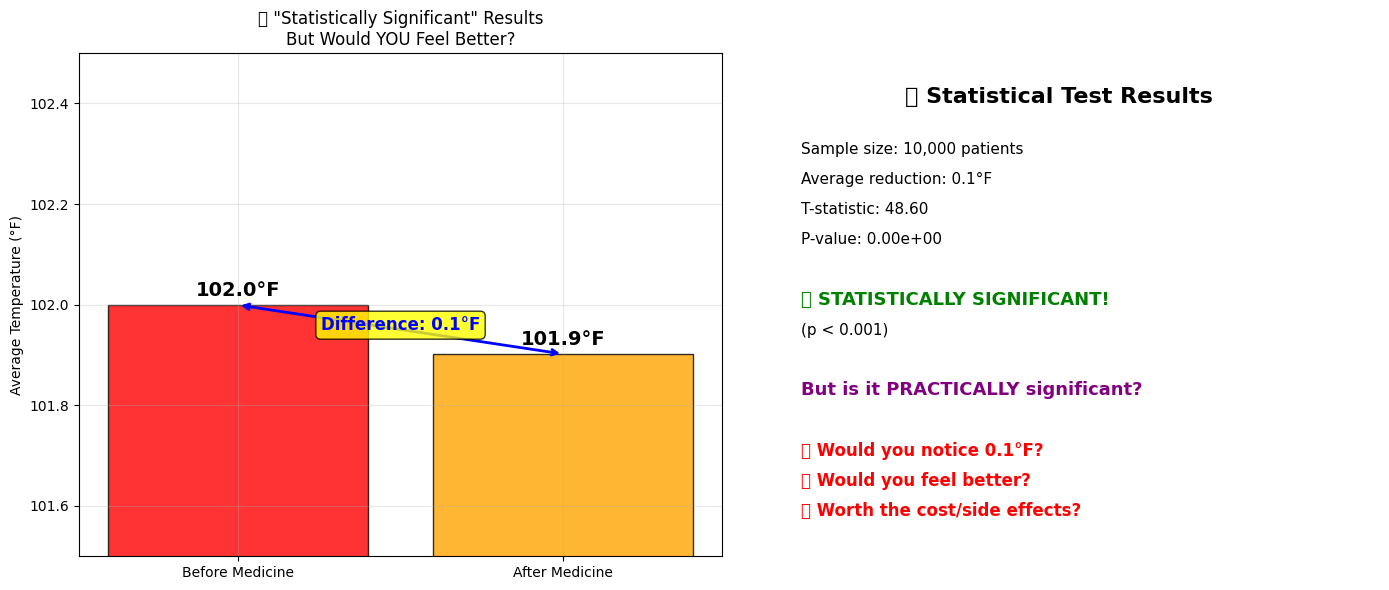


💡 KEY LESSON:
✅ Statistically significant: Yes (p = 0.00e+00)
❓ Practically significant: Questionable (only 0.1°F reduction)

🎯 THE TAKEAWAY:
Large sample sizes can make tiny, meaningless differences 'statistically significant'!


In [2]:
def medicine_example():
    """Demonstrate the difference between statistical and practical significance"""
    
    print("🏥 THE MIRACLE MEDICINE STUDY")
    print("=" * 35)
    print("A pharmaceutical company tested their new fever medicine...\n")
    
    # Simulate large study data
    np.random.seed(42)
    n_patients = 10000  # Large sample size!
    
    # Before medicine: around 102°F
    before_temp = np.random.normal(102.0, 0.3, n_patients)
    
    # After medicine: tiny reduction
    after_temp = before_temp - 0.1 + np.random.normal(0, 0.2, n_patients)
    
    # Calculate statistics
    mean_before = np.mean(before_temp)
    mean_after = np.mean(after_temp)
    difference = mean_before - mean_after
    
    # Perform t-test
    t_stat, p_value = stats.ttest_rel(before_temp, after_temp)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Before and after comparison
    conditions = ['Before Medicine', 'After Medicine']
    temperatures = [mean_before, mean_after]
    colors = ['red', 'orange']
    
    bars = ax1.bar(conditions, temperatures, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_ylabel('Average Temperature (°F)')
    ax1.set_title('🌡️ "Statistically Significant" Results\nBut Would YOU Feel Better?')
    ax1.set_ylim(101.5, 102.5)
    ax1.grid(True, alpha=0.3)
    
    # Add temperature labels
    for bar, temp in zip(bars, temperatures):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{temp:.1f}°F', ha='center', va='bottom', 
                fontsize=14, weight='bold')
    
    # Add the tiny difference
    ax1.annotate('', xy=(1, mean_after), xytext=(0, mean_before),
                arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
    ax1.text(0.5, mean_before - 0.05, f'Difference: {difference:.1f}°F', 
             ha='center', fontsize=12, weight='bold', color='blue',
             bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.8))
    
    # Statistical results
    ax2.axis('off')
    ax2.text(0.5, 0.9, '📊 Statistical Test Results', ha='center', 
             fontsize=16, weight='bold')
    
    results_text = [
        f"Sample size: {n_patients:,} patients",
        f"Average reduction: {difference:.1f}°F",
        f"T-statistic: {t_stat:.2f}",
        f"P-value: {p_value:.2e}",
        "",
        "🎉 STATISTICALLY SIGNIFICANT!",
        "(p < 0.001)",
        "",
        "But is it PRACTICALLY significant?",
        "",
        "🤔 Would you notice 0.1°F?",
        "🤔 Would you feel better?",
        "🤔 Worth the cost/side effects?"
    ]
    
    for i, text in enumerate(results_text):
        y_pos = 0.8 - i * 0.06
        
        if text.startswith('🎉'):
            ax2.text(0.1, y_pos, text, fontsize=13, weight='bold', color='green')
        elif text.startswith('🤔'):
            ax2.text(0.1, y_pos, text, fontsize=12, weight='bold', color='red')
        elif text == "But is it PRACTICALLY significant?":
            ax2.text(0.1, y_pos, text, fontsize=13, weight='bold', color='purple')
        else:
            ax2.text(0.1, y_pos, text, fontsize=11, weight='normal')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 KEY LESSON:")
    print(f"✅ Statistically significant: Yes (p = {p_value:.2e})")
    print(f"❓ Practically significant: Questionable (only {difference:.1f}°F reduction)")
    print(f"\n🎯 THE TAKEAWAY:")
    print(f"Large sample sizes can make tiny, meaningless differences 'statistically significant'!")

medicine_example()

---
## 📈 Business Example: Website A/B Test

**Question:** Is a 0.1% improvement in conversion rate worth implementing?

In [5]:
    # Statistical test
from scipy.stats import proportions_ztest
    
def ab_test_example():
    """Real business scenario showing statistical vs practical significance"""
    
    print("💻 BUSINESS SCENARIO: Website A/B Test")
    print("=" * 45)
    print("Your company tested two website versions with 100,000 visitors each...\n")
    
    # Large A/B test data
    visitors_per_version = 100000
    
    # Tiny difference in conversion rates
    conversion_a = 0.020  # 2.0%
    conversion_b = 0.021  # 2.1% (tiny improvement)
    
    conversions_a = int(visitors_per_version * conversion_a)
    conversions_b = int(visitors_per_version * conversion_b)
    

    
    count = np.array([conversions_a, conversions_b])
    nobs = np.array([visitors_per_version, visitors_per_version])
    z_stat, p_value = proportions_ztest(count, nobs)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Conversion rates comparison
    versions = ['Version A\n(Current)', 'Version B\n(New)']
    rates = [conversion_a, conversion_b]
    colors = ['lightblue', 'lightgreen']
    
    bars = ax1.bar(versions, rates, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_ylabel('Conversion Rate')
    ax1.set_title('📊 A/B Test Results\n"Statistically Significant!"')
    ax1.set_ylim(0, 0.025)
    ax1.grid(True, alpha=0.3)
    
    # Add percentage labels
    for bar, rate in zip(bars, rates):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0002,
                f'{rate:.1%}', ha='center', va='bottom', 
                fontsize=14, weight='bold')
    
    # Business impact analysis
    ax2.axis('off')
    ax2.text(0.5, 0.95, '💼 Business Impact Analysis', ha='center', 
             fontsize=16, weight='bold')
    
    # Calculate business metrics
    improvement = conversion_b - conversion_a
    monthly_visitors = 3000000  # 3M monthly visitors
    monthly_extra_conversions = monthly_visitors * improvement
    revenue_per_conversion = 50  # $50 average
    monthly_extra_revenue = monthly_extra_conversions * revenue_per_conversion
    implementation_cost = 25000  # $25k to implement
    
    business_metrics = [
        f"Statistical significance: p = {p_value:.4f} ✅",
        f"Improvement: +{improvement:.3f} percentage points",
        f"Monthly visitors: {monthly_visitors:,}",
        f"Extra conversions/month: {monthly_extra_conversions:,.0f}",
        f"Extra revenue/month: ${monthly_extra_revenue:,.0f}",
        f"Implementation cost: ${implementation_cost:,}",
        f"Payback period: {implementation_cost/monthly_extra_revenue:.1f} months",
        "",
        "💰 BUSINESS DECISION:"
    ]
    
    for i, metric in enumerate(business_metrics):
        y_pos = 0.85 - i * 0.08
        
        if metric.startswith('Statistical'):
            ax2.text(0.05, y_pos, metric, fontsize=12, weight='bold', color='green')
        elif metric.startswith('💰'):
            ax2.text(0.05, y_pos, metric, fontsize=13, weight='bold', color='purple')
        else:
            ax2.text(0.05, y_pos, metric, fontsize=11)
    
    # Final decision
    if monthly_extra_revenue > implementation_cost:
        decision = "✅ Worth implementing!"
        decision_color = 'green'
    else:
        decision = "❌ Not worth the cost"
        decision_color = 'red'
    
    ax2.text(0.05, 0.05, decision, fontsize=14, weight='bold', color=decision_color,
             bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 RESULTS SUMMARY:")
    print(f"Statistical significance: {'✅ YES' if p_value < 0.05 else '❌ NO'} (p = {p_value:.4f})")
    print(f"Practical significance: {'✅ YES' if monthly_extra_revenue > implementation_cost else '❌ QUESTIONABLE'}")
    print(f"\n💡 KEY INSIGHT:")
    print(f"Even tiny improvements can be valuable with large scale!")
    print(f"Always consider: Effect size + Business context + Costs")

ab_test_example()

ImportError: cannot import name 'proportions_ztest' from 'scipy.stats' (/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/scipy/stats/__init__.py)

---
## 🎮 Significance Calculator

Test different scenarios to see when statistical significance matters!

In [ ]:
def significance_calculator(before_mean, after_mean, sample_size, cost_to_implement=0, 
                          benefit_per_unit=0, units_affected=0):
    """Calculate both statistical and practical significance"""
    
    # Simulate data for t-test
    np.random.seed(42)
    std_dev = abs(before_mean) * 0.1  # Assume 10% standard deviation
    
    before_data = np.random.normal(before_mean, std_dev, sample_size)
    after_data = np.random.normal(after_mean, std_dev, sample_size)
    
    # Statistical test
    t_stat, p_value = stats.ttest_rel(before_data, after_data)
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt((np.var(before_data) + np.var(after_data)) / 2)
    cohens_d = abs(after_mean - before_mean) / pooled_std
    
    print(f"🧮 SIGNIFICANCE ANALYSIS")
    print(f"=" * 30)
    print(f"Sample size: {sample_size:,}")
    print(f"Before: {before_mean:.2f}")
    print(f"After: {after_mean:.2f}")
    print(f"Difference: {after_mean - before_mean:+.2f}")
    print(f"\n📊 STATISTICAL SIGNIFICANCE:")
    print(f"P-value: {p_value:.6f}")
    print(f"Significant? {'✅ YES' if p_value < 0.05 else '❌ NO'} (α = 0.05)")
    print(f"Effect size (Cohen's d): {cohens_d:.3f}")
    
    # Effect size interpretation
    if cohens_d < 0.2:
        effect_size_desc = "Very small"
    elif cohens_d < 0.5:
        effect_size_desc = "Small"
    elif cohens_d < 0.8:
        effect_size_desc = "Medium"
    else:
        effect_size_desc = "Large"
    
    print(f"Effect size: {effect_size_desc}")
    
    # Practical significance
    if cost_to_implement > 0 and benefit_per_unit > 0 and units_affected > 0:
        total_benefit = abs(after_mean - before_mean) * benefit_per_unit * units_affected
        net_benefit = total_benefit - cost_to_implement
        
        print(f"\n💰 PRACTICAL SIGNIFICANCE:")
        print(f"Total benefit: ${total_benefit:,.0f}")
        print(f"Implementation cost: ${cost_to_implement:,.0f}")
        print(f"Net benefit: ${net_benefit:,.0f}")
        print(f"Practically significant? {'✅ YES' if net_benefit > 0 else '❌ NO'}")
    
    print(f"\n🎯 OVERALL ASSESSMENT:")
    if p_value < 0.05 and cohens_d >= 0.2:
        if cost_to_implement == 0 or net_benefit > 0:
            print(f"✅ Both statistically AND practically significant!")
        else:
            print(f"⚠️  Statistically significant but not cost-effective")
    elif p_value < 0.05:
        print(f"⚠️  Statistically significant but very small effect")
    else:
        print(f"❌ Not statistically significant")

# Example 1: Large sample, tiny effect
print("🎮 EXAMPLE 1: Huge Study, Tiny Effect")
significance_calculator(100, 100.1, 50000, 10000, 1, 100000)

print("\n" + "="*50)
print("🎮 EXAMPLE 2: Small Sample, Big Effect")
significance_calculator(100, 110, 20, 1000, 10, 1000)

print("\n" + "="*50)
print("🎮 TRY YOUR OWN:")
print("Modify the cell below!")

In [ ]:
# 🎮 TEST YOUR OWN SCENARIO!
# Format: significance_calculator(before, after, sample_size, cost, benefit_per_unit, units_affected)

significance_calculator(
    before_mean=50,          # Before value
    after_mean=52,           # After value  
    sample_size=1000,        # Number of observations
    cost_to_implement=5000,  # Cost to implement change
    benefit_per_unit=10,     # Benefit per unit of improvement
    units_affected=10000     # How many units will be affected
)

# Try these scenarios by uncommenting:
# significance_calculator(2.0, 2.01, 1000000)  # Massive sample, tiny effect
# significance_calculator(50, 75, 10)          # Small sample, big effect

---
## 🎯 Quick Decision Framework

**Use this checklist before making decisions based on statistical tests:**

In [ ]:
def decision_framework():
    """Display decision framework for statistical vs practical significance"""
    
    print("🎯 DECISION FRAMEWORK: IS IT WORTH ACTING ON?")
    print("=" * 55)
    
    framework = {
        "1️⃣ Statistical Significance": [
            "✅ P-value < 0.05? (or your chosen α)",
            "✅ Confidence interval excludes null?",
            "⚠️  Remember: Large samples can make tiny effects significant!"
        ],
        "2️⃣ Effect Size": [
            "📏 How big is the actual difference?",
            "📊 Cohen's d: Small (0.2), Medium (0.5), Large (0.8)",
            "🎯 Is the effect meaningful in your context?"
        ],
        "3️⃣ Practical Impact": [
            "💰 What's the financial impact?",
            "⚖️  Benefits vs costs of implementing?",
            "📈 How many people/units affected?",
            "⏰ Implementation time and effort?"
        ],
        "4️⃣ Context Matters": [
            "🏥 Life-or-death: Even small effects matter",
            "💼 Business: Focus on ROI and impact",
            "🎓 Research: Consider theoretical importance",
            "🔬 Medicine: Clinical significance vs statistical"
        ]
    }
    
    for category, points in framework.items():
        print(f"\n{category}:")
        for point in points:
            print(f"  {point}")
    
    print(f"\n🚨 RED FLAGS - Be Skeptical When:")
    red_flags = [
        "🔍 Huge sample size with tiny effect",
        "💸 High implementation cost for small gain", 
        "📊 Significant but no practical difference",
        "🎣 'Fishing' for significance with multiple tests",
        "📈 Focusing only on p-values, ignoring effect size"
    ]
    
    for flag in red_flags:
        print(f"  {flag}")
    
    print(f"\n✅ GREEN LIGHTS - Proceed When:")
    green_lights = [
        "📊 Statistically significant AND meaningful effect size",
        "💰 Clear positive ROI or important non-financial benefit", 
        "🎯 Effect size meaningful in your domain",
        "⚖️  Benefits outweigh costs and risks",
        "🔬 Replicable results from well-designed studies"
    ]
    
    for light in green_lights:
        print(f"  {light}")
    
    print(f"\n💡 REMEMBER:")
    print(f"Statistical significance tells you IF there's an effect.")
    print(f"Practical significance tells you if you should CARE about it!")

decision_framework()

---
## 🎯 Quick Summary

**Key Concepts:**
- 📊 **Statistical Significance** = "Is this difference real or just chance?"
- 💼 **Practical Significance** = "Is this difference big enough to matter?"
- 🎯 **You need BOTH** for good decisions!

**Common Situations:**
- 🔍 Large samples + tiny effects = Statistically significant but useless
- 📈 Small samples + big effects = Practically important but maybe not proven
- ✅ Large samples + meaningful effects = The sweet spot!

**Business Applications:**
- 🅰️🅱️ A/B testing: Don't just chase p-values
- 💊 Product improvements: Consider implementation costs
- 📊 Performance metrics: Focus on actionable differences
- 🎯 Decision making: Always ask "So what?"

**Remember:** *Statistics without context is just math. Always ask whether your "significant" result actually signifies something important!* 🎯